In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv("LoansTrainingSetV2.csv",low_memory=False)
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [2]:
#Some Data Cleaning
train['Monthly Debt']=train['Monthly Debt'].str.replace('$','')
train['Monthly Debt']=train['Monthly Debt'].str.replace(',','')
train['Monthly Debt']=train['Monthly Debt'].str.strip()

train['Maximum Open Credit']=train['Maximum Open Credit'].replace('#VALUE!',np.nan)

train.loc[train['Current Loan Amount']==99999999,'Current Loan Amount']=np.nan

train['Months since last delinquent']=train['Months since last delinquent'].map(str)
train['Months since last delinquent']=train['Months since last delinquent'].str.replace('NA', '')
train.loc[train['Months since last delinquent']=='','Months since last delinquent']=np.nan
train['Months since last delinquent']=train['Months since last delinquent'].astype(float)

train['Maximum Open Credit']=train['Maximum Open Credit'].map(str)
train['Maximum Open Credit']=train['Maximum Open Credit'].str.replace('NA', '')
train.loc[train['Maximum Open Credit']=='','Maximum Open Credit']=np.nan
train['Maximum Open Credit']=train['Maximum Open Credit'].astype(float)

train['Bankruptcies']=train['Bankruptcies'].map(str)
train['Bankruptcies']=train['Bankruptcies'].str.replace('NA', '')
train.loc[train['Bankruptcies']=='','Bankruptcies']=np.nan
train['Bankruptcies']=train['Bankruptcies'].astype(float)

train['Tax Liens']=train['Tax Liens'].map(str)
train['Tax Liens']=train['Tax Liens'].str.replace('NA', '')
train.loc[train['Tax Liens']=='','Tax Liens']=np.nan
train['Tax Liens']=train['Tax Liens'].astype(float)

train.describe()


,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,98369.000000,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,1.111050e+05,110879.00000,111096.000000
mean,14182.062144,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,3.438644e+04,0.11766,0.029353
std,8459.992025,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,3.643027e+05,0.35142,0.260575
min,491.000000,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000
25%,7830.000000,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,1.241700e+04,0.00000,0.000000
50%,12145.000000,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,2.124300e+04,0.00000,0.000000
75%,19660.000000,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,3.558400e+04,0.00000,0.000000
max,35875.000000,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.00000,15.000000


In [3]:
#Some Factorization
train['Monthly Debt']=train['Monthly Debt'].astype(float)
r1={'Charged Off':'0','Fully Paid':'1'}
train['Loan Status']=train['Loan Status'].map(r1)
train['Loan Status']=train['Loan Status'].astype(float)


r2 = {'Short Term':'0', 'Long Term':'1'}
train['Term']=train['Term'].map(r2)
train['Term']=train['Term'].astype(float)

r3 ={'< 1 year':'0', '10+ years':'10', '9 years':'9', '3 years':'3', '2 years':'2', '7 years':'7','6 years':'6', '1 year':'1', '5 years':'5', '4 years':'4', '8 years':'8', 'n/a':np.nan}
train['Years in current job']=train['Years in current job'].map(r3)
train['Years in current job']=train['Years in current job'].astype(float)

r4={'Rent':'1', 'Home Mortgage':'2', 'Own Home':'3', 'HaveMortgage':'2'}
train['Home Ownership']=train['Home Ownership'].map(r4)
train['Home Ownership']=train['Home Ownership'].astype(float)

r5={'Debt Consolidation':'1', 'Home Improvements':'2', 'other':'3', 'Business Loan':'4','small_business':'5', 'Other':'3', 'moving':'6', 'Buy a Car':'7', 'Medical Bills':'8','Buy House':'9', 'Take a Trip':'10', 'vacation':'11', 'major_purchase':'12','Educational Expenses':'13', 'wedding':'14', 'renewable_energy':'15'}
train['Purpose']=train['Purpose'].map(r5)
train['Purpose']=train['Purpose'].astype(float)

In [4]:
#NA counts
train.isnull().sum(axis = 0)

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount             12738
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [5]:
#Clean Nas
train['Current Loan Amount'] = train['Current Loan Amount'].fillna(train['Current Loan Amount'].median())
train['Credit Score'] = train['Credit Score'].fillna(train['Credit Score'].median())
train['Years in current job'] = train['Years in current job'].fillna(train['Years in current job'].median())
train['Annual Income'] = train['Annual Income'].fillna(train['Annual Income'].median())
train['Months since last delinquent'] = train['Months since last delinquent'].fillna(train['Months since last delinquent'].median())
train['Maximum Open Credit'] = train['Maximum Open Credit'].fillna(train['Maximum Open Credit'].median())
train['Bankruptcies'] = train['Bankruptcies'].fillna(train['Bankruptcies'].median())
train['Tax Liens'] = train['Tax Liens'].fillna(train['Tax Liens'].median())


In [6]:
#NA counts
train.isnull().sum(axis = 0)

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [7]:
print(train.dtypes)

Loan ID                          object
Customer ID                      object
Loan Status                     float64
Current Loan Amount             float64
Term                            float64
Credit Score                    float64
Years in current job            float64
Home Ownership                  float64
Annual Income                   float64
Purpose                         float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


Counts

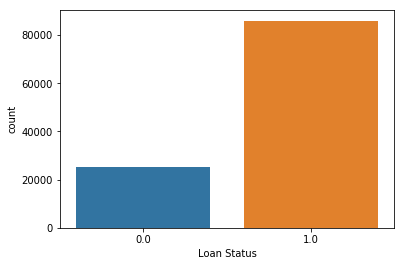

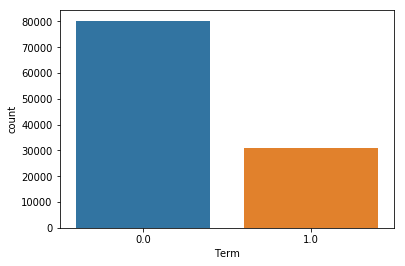

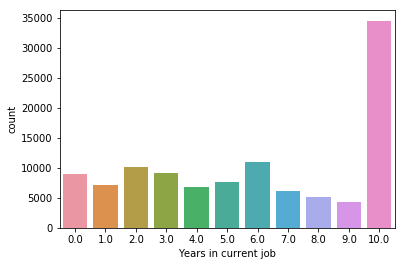

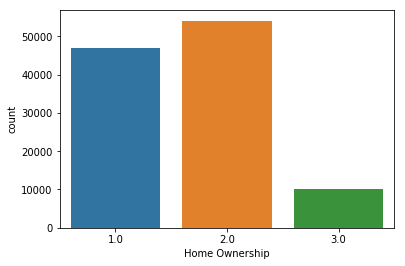

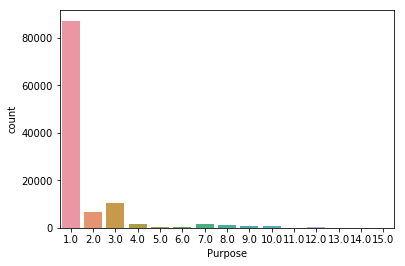

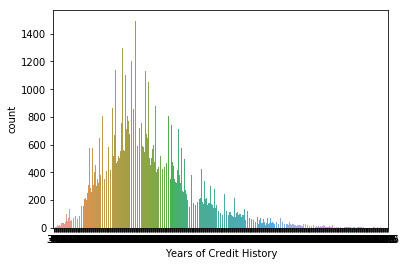

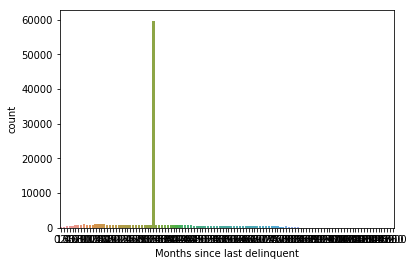

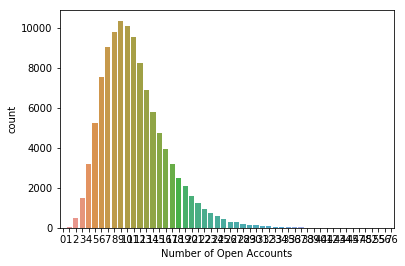

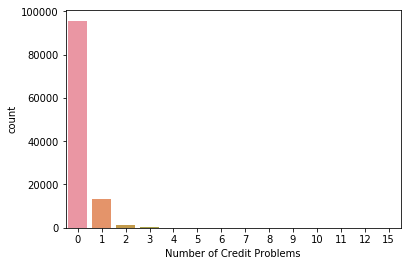

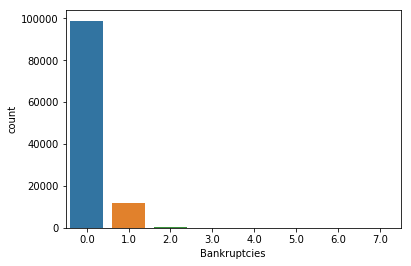

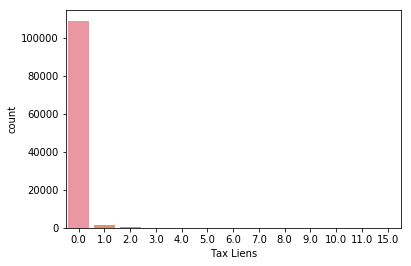

In [8]:
sns.countplot(train['Loan Status'])
plt.show()
sns.countplot(train['Term'])
plt.show()
sns.countplot(train['Years in current job'])
plt.show()
sns.countplot(train['Home Ownership'])
plt.show()
sns.countplot(train['Purpose'])
plt.show()
sns.countplot(train['Years of Credit History'])
plt.show()
sns.countplot(train['Months since last delinquent'])
plt.show()
sns.countplot(train['Number of Open Accounts'])
plt.show()
sns.countplot(train['Number of Credit Problems'])
plt.show()
sns.countplot(train['Bankruptcies'])
plt.show()
sns.countplot(train['Tax Liens'])

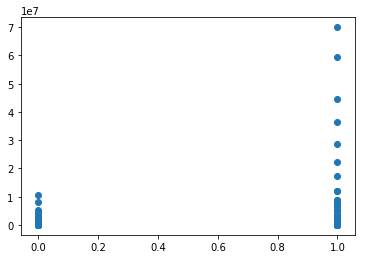

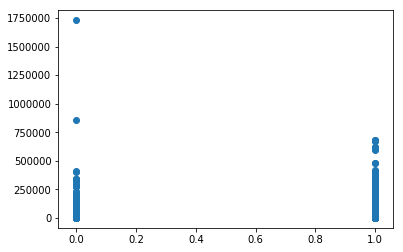

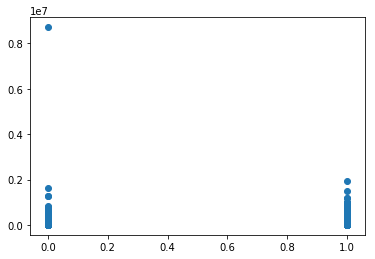

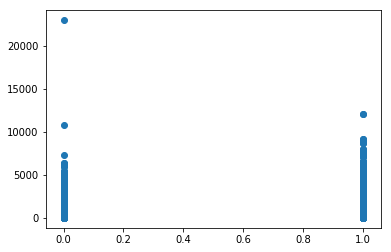

In [9]:
#View Outliers
plt.scatter(x=train['Loan Status'],y=train['Maximum Open Credit'])
plt.show()
plt.scatter(x=train['Loan Status'],y=train['Current Credit Balance'])
plt.show()
plt.scatter(x=train['Loan Status'],y=train['Annual Income'])
plt.show()
plt.scatter(x=train['Loan Status'],y=train['Monthly Debt'])
plt.show()

In [10]:
#Clip Outliers

train[train['Maximum Open Credit']>20000000]=20000000
train[train['Current Credit Balance']>500000]=500000
train[train['Annual Income']>2000000]=2000000
train[train['Monthly Debt']>10000]=10000

In [11]:
#add some new features to incease wight of features
train['Credit Score']=train['Credit Score']*train['Credit Score']
train['Diff']=(train['Annual Income']/12-train['Monthly Debt'])**2
train['Freg']=(train['Number of Credit Problems']/train['Years of Credit History'])**2

train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Diff,Freg
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0.0,12232.0,0.0,52998400.0,0.0,1.0,46643.0,1.0,...,18.0,10.0,12,0,6762,7946.0,0.0,0.0,9.669156e+06,0.000000
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0.0,25014.0,1.0,53728900.0,10.0,2.0,81099.0,1.0,...,26.7,32.0,14,0,35706,77961.0,0.0,0.0,3.441183e+07,0.000000
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0.0,16117.0,0.0,52417600.0,9.0,2.0,60438.0,2.0,...,16.7,32.0,11,1,11275,14815.0,1.0,0.0,1.438290e+07,0.003586
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,0.0,11716.0,0.0,54760000.0,3.0,1.0,34171.0,1.0,...,10.0,32.0,21,0,7009,43533.0,0.0,0.0,3.447124e+06,0.000000
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,0.0,9789.0,1.0,47059600.0,10.0,2.0,47003.0,2.0,...,16.7,25.0,13,1,16913,19553.0,1.0,0.0,1.164998e+07,0.003586


In [12]:
train=train.drop(['Loan ID','Customer ID'],axis=1)

train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Diff,Freg
0,0.0,12232.0,0.0,52998400.0,0.0,1.0,46643.0,1.0,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0,9.669156e+06,0.000000
1,0.0,25014.0,1.0,53728900.0,10.0,2.0,81099.0,1.0,892.09,26.7,32.0,14,0,35706,77961.0,0.0,0.0,3.441183e+07,0.000000
2,0.0,16117.0,0.0,52417600.0,9.0,2.0,60438.0,2.0,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0,1.438290e+07,0.003586
3,0.0,11716.0,0.0,54760000.0,3.0,1.0,34171.0,1.0,990.94,10.0,32.0,21,0,7009,43533.0,0.0,0.0,3.447124e+06,0.000000
4,0.0,9789.0,1.0,47059600.0,10.0,2.0,47003.0,2.0,503.71,16.7,25.0,13,1,16913,19553.0,1.0,0.0,1.164998e+07,0.003586


In [13]:
#split data for cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train.drop(['Loan Status'], axis=1),
                                                 train['Loan Status'],random_state=703,test_size=0.3)
y_test.head()

19338    0.0
52825    0.0
39413    1.0
22068    1.0
95020    1.0
Name: Loan Status, dtype: float64

In [16]:
# Train and Test Model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(x_train, y_train)


print(model)

y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 81.85%


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


This model is 7th of 13734 submissions at https://gallery.azure.ai/Competition/1ad7a6df99794816b9bc071e27d46b10

In [ ]:
1+1